#Outliers example 2 

## example of outlier test for the pairs of values, $y=f(x)$


In [2]:
%pylab inline
import matplotlib as mpl
mpl.rcParams['lines.linewidth']=2
mpl.rcParams['lines.color']='r'
mpl.rcParams['figure.figsize']=(8,6)
mpl.rcParams['font.size']=14
mpl.rcParams['axes.labelsize']=20

Populating the interactive namespace from numpy and matplotlib


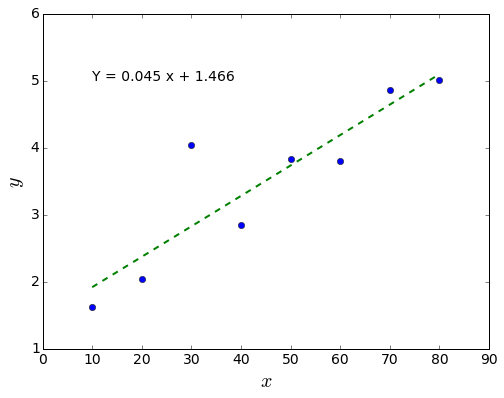

In [32]:
x = array([10.0,20.03,30.01,40.02,50.02,60.01,70.00,80.01])
y = array([1.62,2.04,4.05,2.85,3.84,3.81,4.86,5.02])
plot(x,y,'o')
xlim([0,90])
ylim([1,6])
xlabel('$x$'),ylabel('$y$')
hold(True)

# best fit is linear
p = polyfit(x,y,1)
Y = polyval(p,x)
plot(x,Y,'--')
text(10,5,'Y = %4.3f x + %4.3f' % (p[0],p[1]))

### Test 1/2: Use standard error of the estimate:

$$ S_{y,x}=\sqrt{\frac{\sum_{i=1}^{i=n}(y_{i}-Y_{i})^{2}}{\nu}},\,\,\,\nu=n-(m+1)$$

and the **standardized residuals**

$$ \frac{e_i}{S_{y,x}} = \frac{|Y_i-y_i|}{S_{y,x}}$$

From compare it with the value of 2 (very close to the t-distribution for 95%), i.e. if:

$$\left|e_{i}/S_{y,x}\right|>2$$

then it's an **outlier**


### Test 2/2: compare with the neighbour values - consistency

In [33]:
n = len(x)
m = 2 # linear fit
nu = n - (m+1)
Syx = sqrt(sum((Y - y)**2)/nu)
print Syx

0.646560994947


(<matplotlib.text.Text at 0xa8a2ef0>, <matplotlib.text.Text at 0xa8b43f0>)

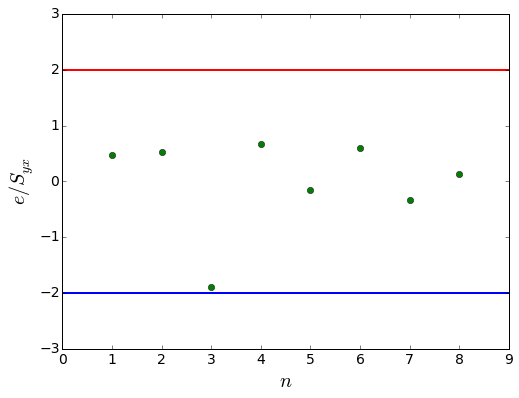

In [51]:
e = Y-y
plot(arange(1,n+1),e/Syx,'go')
plot([0,n+1],[-2,-2],'b-',[0,n+1],[2,2],'r-')
xlim([0,n+1]),ylim([-3,3])
xlabel('$n$'),ylabel('$e/S_{yx}$')